In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Monte Carlo Integral
If a function $f(x)$ is defined on the interval $[a,b]$, then the integral of $f(x)$ over the interval $[a,b]$ is defined as
$$ F = \int_a^b f(x)dx $$
The integral of $f(x)$ over the interval $[a,b]$ is the area under the curve of $f(x)$ between $x=a$ and $x=b$.

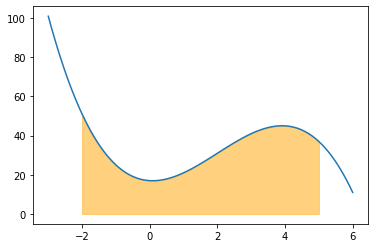

In [56]:
def f(x):
    return -x**3 + 6*x**2 -x + 17

# plot the function between [-3, 6] and shade the area under the curve between x = -2 and x = 5
x = np.linspace(-3, 6, 100)
y = f(x)
plt.plot(x, y)
plt.fill_between(x, y, where=(x >= -2) & (x <= 5), color='orange', alpha=0.5)
plt.show()

The integral of $f(x)$ over the interval $[a,b]$ can be approximated by taking a large number of random points in the interval $[a,b]$ and computing the average of the function values at those points. This is called the Monte Carlo method. The more points that are used, the more accurate the approximation.

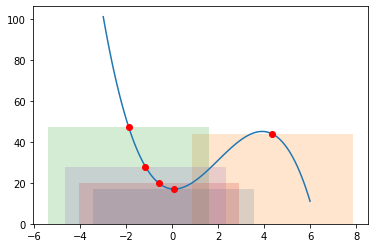

In [65]:
x = np.linspace(-3, 6, 100)
y = f(x)
plt.plot(x, y)

# take 5 random points between [-2, 5] and fill rectangles with height equal to the function value at that point and plot them in different colors
for i in range(5):
    x = np.random.uniform(-2, 5)
    y = f(x)
    plt.plot(x, y, 'ro')
    plt.bar(x, y, width=7, color='C{}'.format(i), alpha=0.2)

So the Monte Carlo method for approximating the integral of $f(x)$ over the interval $[a,b]$ is as follows:
1. Generate $N$ random points in the interval $[a,b]$.
2. Compute the average of the function values at those points.
3. Multiply the average by the length of the interval $[a,b]$.

    $$ \frac{1}{N} \sum_{i=1}^N f(x_i) \cdot (b-a) $$

In [2]:
def estimate_integral(f, a, b, n):
    """Estimate the integral of f(x) from a to b using n samples."""
    x = np.random.uniform(a, b, n)
    return (b - a) * np.mean(f(x))

In [21]:
def test_estimate_integral(funct, a, b, n, exact, tol=1E-2):
    """Test the estimate_integral function."""
    est = estimate_integral(funct, a, b, n)
    print("Estimate: ", est)
    print("Exact: ", exact)
    print("Error: ", abs(est - exact))
    if abs(est - exact) < tol:
        print("Test passed")
    else:
        print("Test failed")

### Test for sin(x)
Let's test the Monte Carlo method for approximating the integral of $f(x) = \sin(x)$ over the interval $[0, \pi]$. The exact value of the integral is $2$.

In [66]:
test_estimate_integral(np.sin, 0, np.pi, 100000, 2)

Estimate:  1.9959115172393296
Exact:  2
Error:  0.00408848276067042
Test passed
